In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df=pd.read_csv('dataset1.csv')

In [4]:
#Print 5 sample from dataset
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
235,10.07,1.25,Male,No,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
219,30.14,3.09,Female,Yes,Sat,Dinner,4
215,12.90,1.10,Female,Yes,Sat,Dinner,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<ipython-input-9-08d2c75decc2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

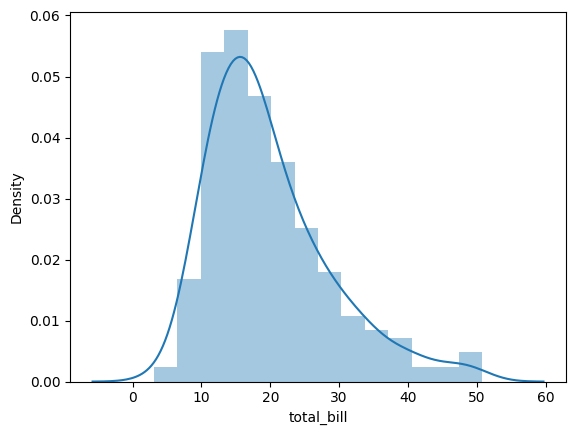

In [9]:
sns.distplot(df['total_bill'])

In [10]:
a=df['total_bill']
mean=a.mean()
median=np.median(a)
mode=a.mode()

<ipython-input-11-a74b4de64e66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a,hist=False)


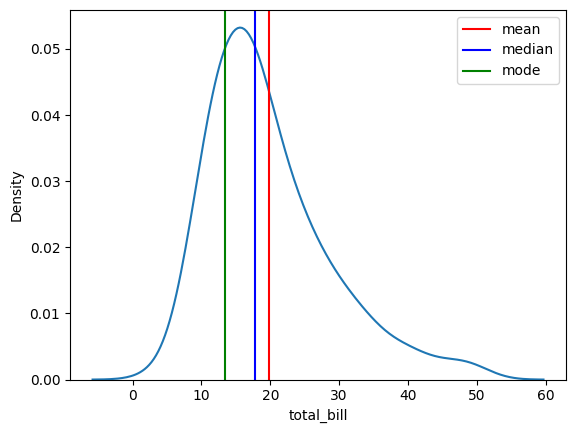

In [11]:
sns.distplot(a,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

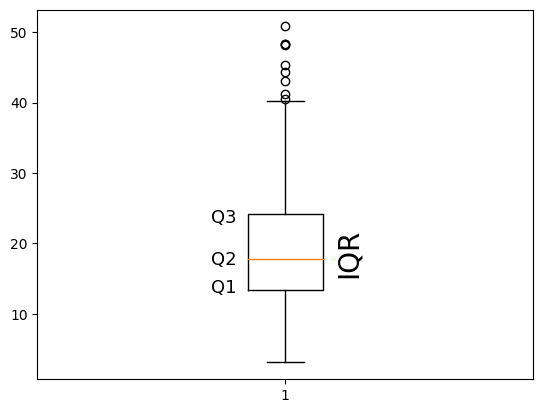

In [12]:
plt.boxplot(a)
plt.text(0.85,13,s='Q1',size=13)
plt.text(0.85,17,s='Q2',size=13)
plt.text(0.85,23,s='Q3',size=13)
plt.text(1.1,16,s='IQR',rotation=90,size=20)
plt.show()

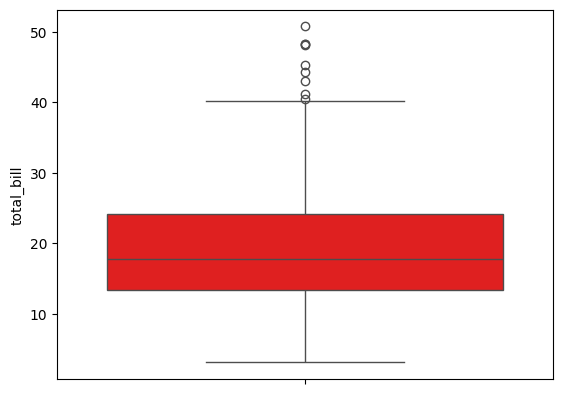

In [13]:
sns.boxplot(a,color='red')
plt.show()

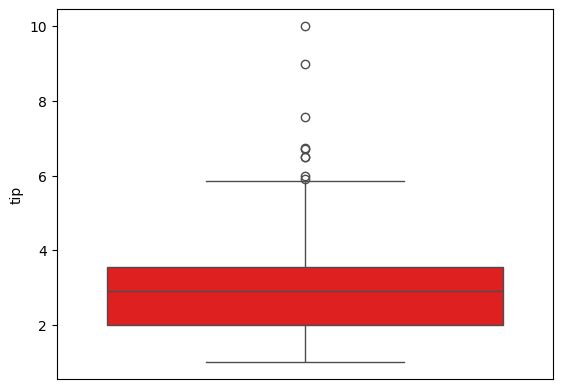

In [18]:
a=df['tip']
mean=a.mean()
median=np.median(a)
mode=a.mode()
plt.boxplot(a)
sns.boxplot(a,color='red')
plt.show()

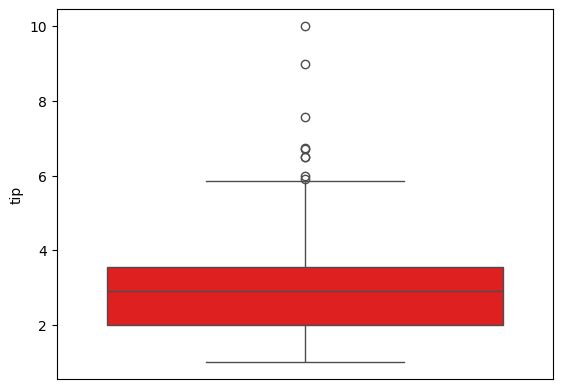

In [25]:
a=df['tip']
mean=a.mean()
median=np.median(a)
mode=a.mode()
plt.boxplot(a)
sns.boxplot(a,color='red')
plt.show()

In [32]:
# Convert the 'sex' column to numeric values
df['sex'] = df['sex'].replace({'Female': 0, 'Male': 1})
# Print the first five rows of the dataframe
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,1,Sun,Dinner,2
1,10.34,1.66,1,1,Sun,Dinner,3
2,21.01,3.50,1,1,Sun,Dinner,3
3,23.68,3.31,1,1,Sun,Dinner,2
4,24.59,3.61,0,1,Sun,Dinner,4


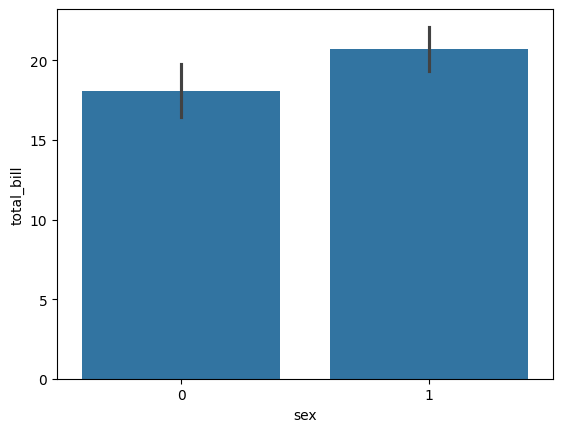

In [33]:
# prompt: make a plot for sex table

sns.barplot(x = 'sex', y = 'total_bill', data = df)
plt.show()


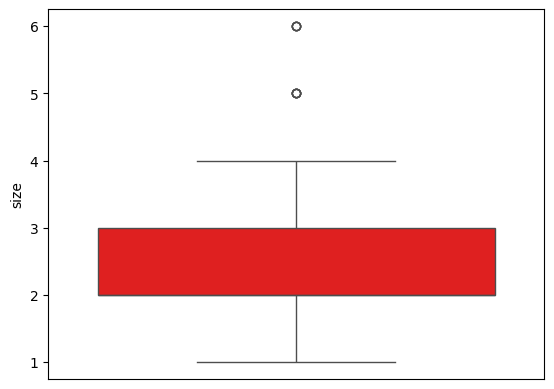

In [29]:
a=df['size']
mean=a.mean()
median=np.median(a)
mode=a.mode()
plt.boxplot(a)
sns.boxplot(a,color='red')
plt.show()

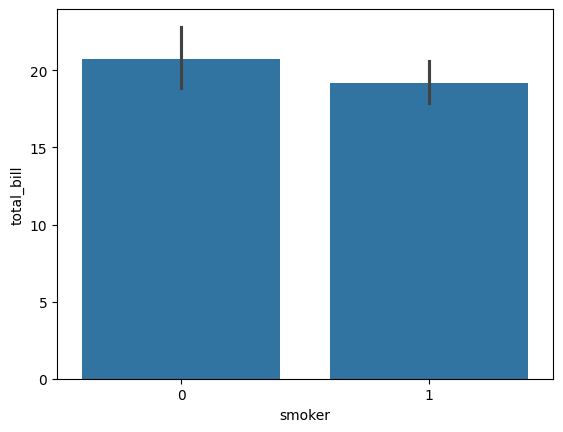

In [35]:
# Convert the 'sex' column to numeric values
df['smoker'] = df['smoker'].replace({'Yes': 0, 'No': 1})
# Print the first five rows of the dataframe
df.head()

sns.barplot(x = 'smoker', y = 'total_bill', data = df)
plt.show()

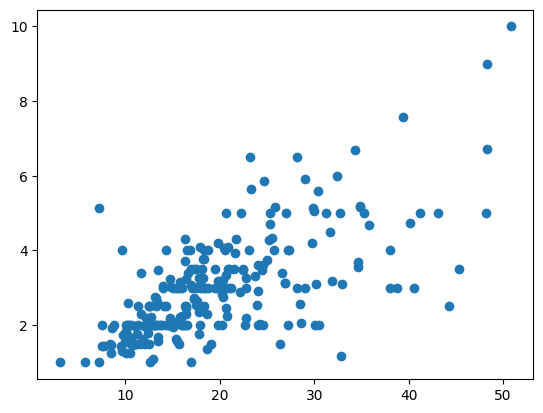

In [36]:
plt.scatter(df['total_bill'],df['tip'])
plt.show()

In [ ]:
# prompt: code to remove outlier from dataset

import pandas as pd

# Define the dataset
data = {'total_bill': [16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29, 10.65, 12.60, 28.17, 10.51, 16.58, 18.97, 15.09, 15.81, 18.29, 10.77, 15.69, 16.97, 18.78, 15.53, 10.07, 12.64, 16.32, 16.93, 20.65, 16.66, 10.88, 17.92, 20.76, 15.69, 13.42, 18.35, 18.29, 10.29, 20.45, 10.58, 16.31, 16.93, 15.01, 13.81, 17.46, 10.74, 18.04, 10.97, 9.68, 15.98, 18.69, 12.90, 10.63, 20.53, 16.52, 10.09, 11.61, 12.02, 12.66, 13.94, 16.27, 10.07, 17.82, 18.71, 10.59, 10.65, 11.85, 12.99, 10.82, 15.48, 16.18, 12.90, 13.42, 15.95, 10.25, 13.32, 10.07, 17.26, 10.53, 12.16, 11.69, 16.45, 10.34, 10.90, 13.13, 10.78, 12.31, 10.29, 10.52, 12.54, 11.38, 15.98, 18.28, 10.76, 12.03, 13.27, 10.27, 13.13, 12.83, 10.09, 13.60, 10.51, 12.12, 10.61, 10.34, 11.12, 10.81, 12.16, 10.71, 10.27, 10.37, 10.96, 12.88, 12.48, 12.90, 11.21, 10.77, 10.27, 16.21, 10.65, 11.80, 12.98, 10.58, 10.34, 10.90, 11.24, 10.77, 10.27, 10.26, 10.63, 13.03, 10.52, 10.16, 11.59, 10.61, 10.75, 10.29, 10.37, 10.57, 10.34, 12.51, 10.29, 10.63, 10.12, 10.83, 10.51, 10.34, 10.27, 10.65, 10.72, 10.29, 10.34, 10.61, 10.88, 10.92, 12.14, 11.35, 10.73, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.73, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10.27, 10.34, 10.61, 10.57, 10.34, 10

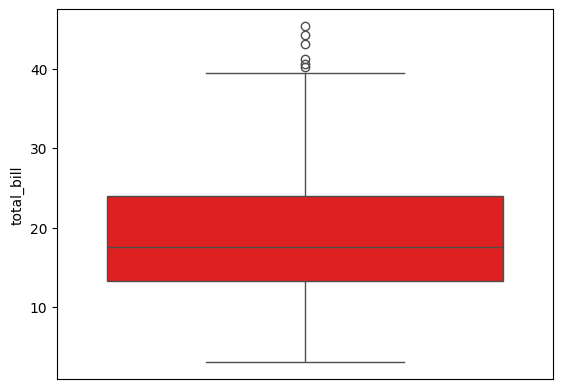

In [39]:
a=df['total_bill']
mean=a.mean()
median=np.median(a)
mode=a.mode()
plt.boxplot(a)
sns.boxplot(a,color='red')
plt.show()

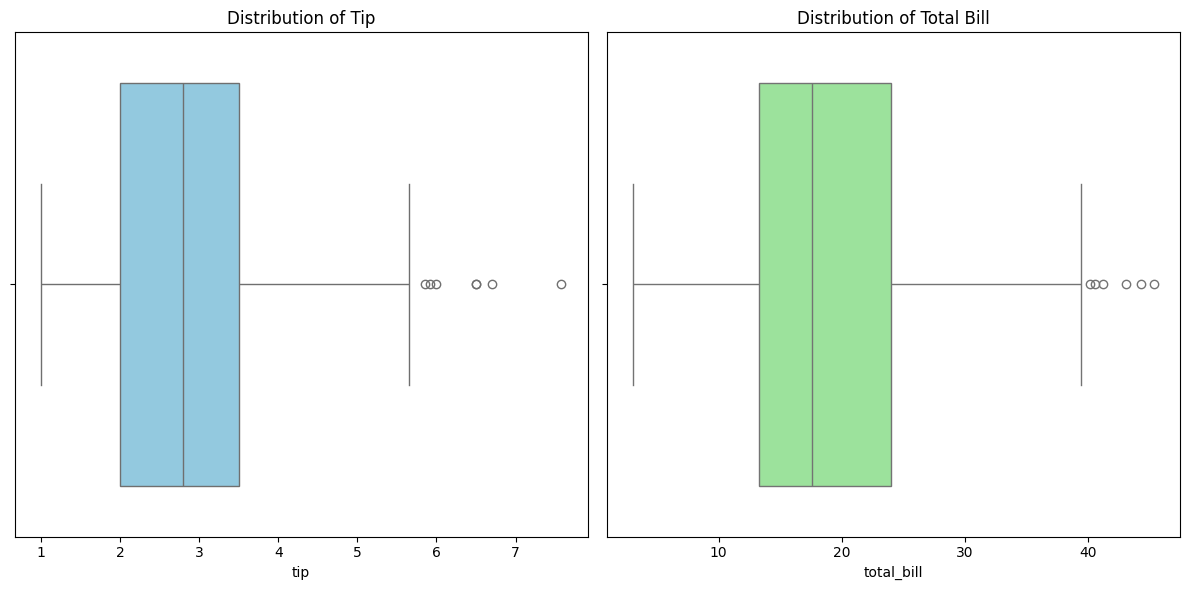

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'tips' is the correct DataFrame containing the data
plt.figure(figsize=(12, 6))

# Boxplot for 'tip'
plt.subplot(1, 2, 1)
sns.boxplot(x='tip', data=df, color='skyblue')  # Use 'tips' instead of 'tip'
plt.title('Distribution of Tip')

# Boxplot for 'total_bill'
plt.subplot(1, 2, 2)
sns.boxplot(x='total_bill', data=df, color='lightgreen')
plt.title('Distribution of Total Bill')

plt.tight_layout()
plt.show()

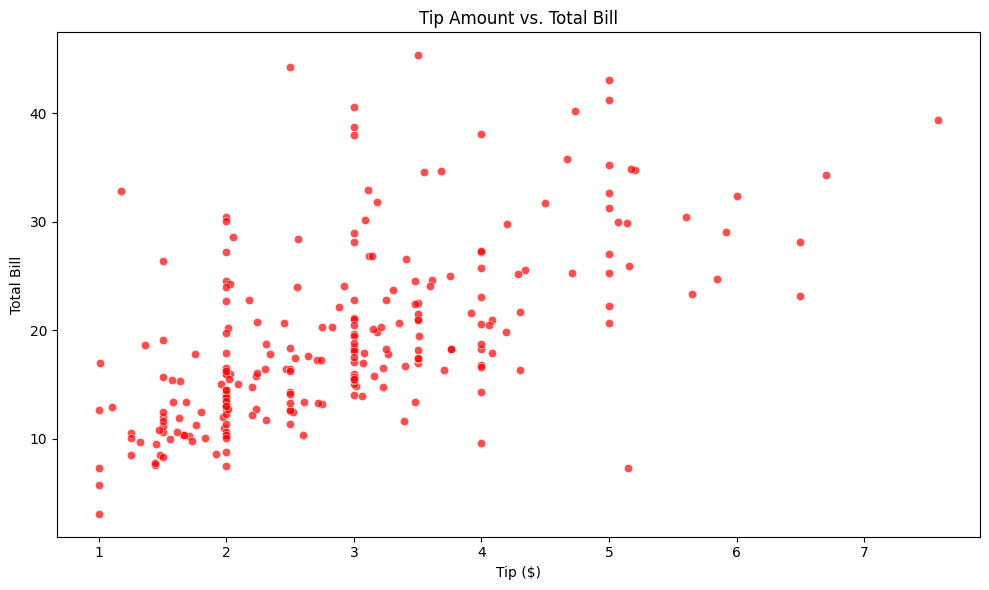

In [48]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tip', y='total_bill', data=df, color='red', alpha=0.7)
plt.xlabel('Tip ($)')
plt.ylabel('Total Bill')
plt.title('Tip Amount vs. Total Bill')
plt.tight_layout()
plt.show()

In [54]:


X = df[['total_bill']]
y = df['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

In [55]:
#Training
model.fit(X_train, y_train)

LinearRegression()

In [56]:
#Prediction
y_pred = model.predict(X_test)

In [58]:
# Calculate the Mean Squared Error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.8410401169208573
R^2 Score: 0.2112100933731792


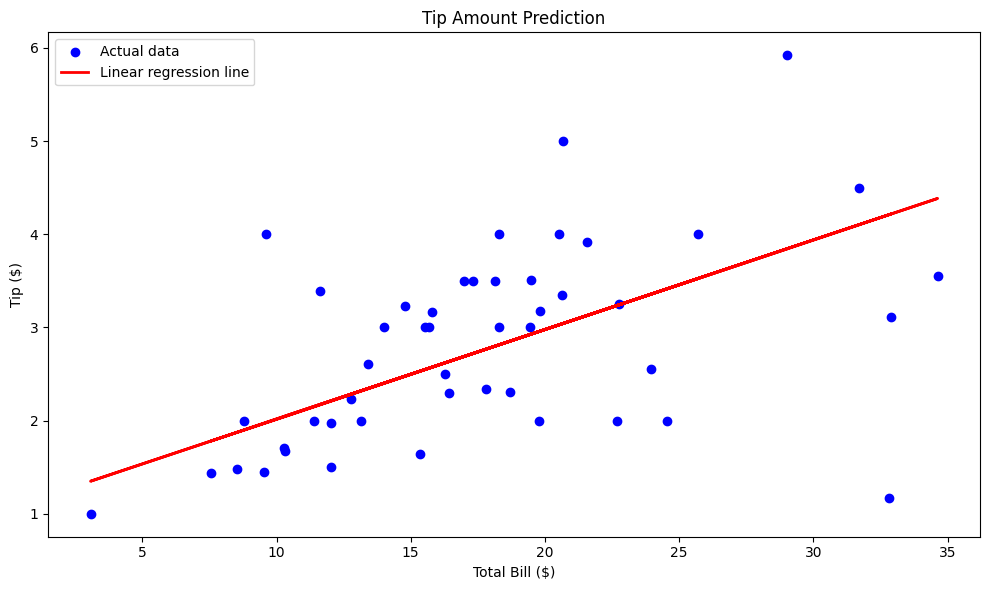

In [59]:
# Visualize the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear regression line')
plt.xlabel('Total Bill')
plt.ylabel('Tip ($)')
plt.title('Tip Amount Prediction')
plt.legend()
plt.tight_layout()
plt.show()

In [64]:
# prompt: compare the predicted value with actual value

# Create a dataframe to compare actual and predicted values
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the dataframe
print(df_comparison.head(10))


     Actual  Predicted
24     3.18   2.959721
6      2.00   1.897362
94     3.25   3.241415
110    3.00   2.400180
105    1.64   2.530932
175    3.11   4.217248
237    1.17   4.210518
87     4.00   2.811664
9      3.23   2.475170
144    2.30   2.633803
